# Titanic Data Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Importing required libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [3]:
titanic_df=pd.read_csv('../input/titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploring the data

Missing data

In [4]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

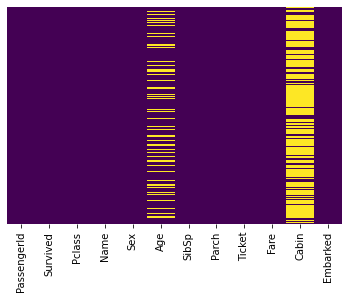

In [5]:
# Heatmap to plot null values in the dataset
sns.heatmap(titanic_df.isna(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing.We can fill the missing data in the Age column through inbuilt functions or with mean or median or else with some form of imputation.

Cabin column has much of its data missing.We will drop that column.

Let's visualise the data and see some relations as well as some distributions.

<AxesSubplot:xlabel='Survived', ylabel='count'>

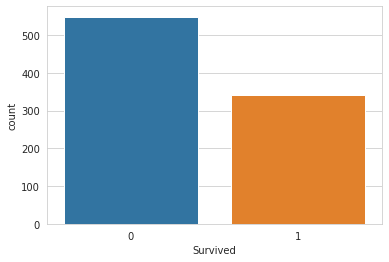

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

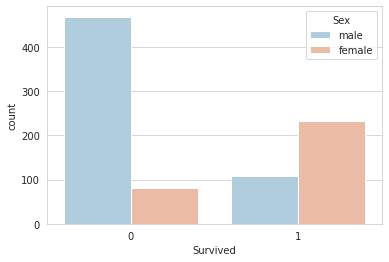

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic_df,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

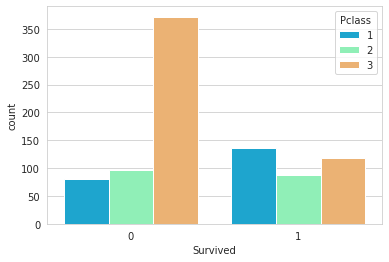

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_df,palette='rainbow')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

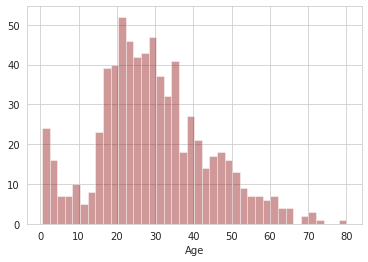

In [9]:
sns.distplot(titanic_df['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

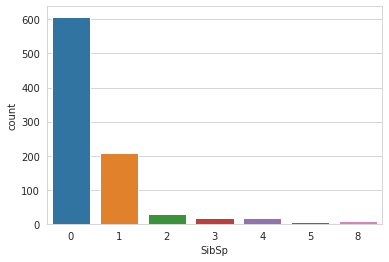

In [10]:
sns.countplot(x='SibSp',data=titanic_df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

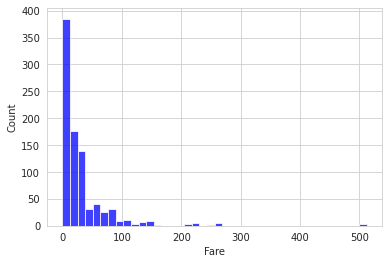

In [11]:
sns.histplot(titanic_df['Fare'],bins=40,color='blue')

## Data Cleaning

In [12]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
titanic_df['Age']=titanic_df['Age'].interpolate()
titanic_df['Age'].isna().sum()

0

<AxesSubplot:>

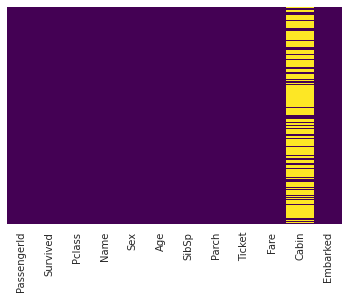

In [14]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The missing data is handled but Cabin column has much missing data so we drop it.

## Feature Selection and Conversion

In [15]:
cols=['Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']
X=titanic_df[cols]
y=titanic_df['Survived']

We have selected the columns that highly impact the survival chances.

In [16]:
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,3,male,1,0,7.2500,S,22.0
1,1,female,1,0,71.2833,C,38.0
2,3,female,0,0,7.9250,S,26.0
3,1,female,1,0,53.1000,S,35.0
4,3,male,0,0,8.0500,S,35.0


In [17]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [18]:
sex=pd.get_dummies(X['Sex'],drop_first=True)
embark=pd.get_dummies(X['Embarked'],drop_first=True)

As Sex and Embarked columns has data other than Numerical data we will convert that data by using get_dummies() function in Pandas.

In [19]:
X=pd.concat([X,sex,embark],axis=1)

In [20]:
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age,male,Q,S
0,3,male,1,0,7.2500,S,22.0,1,0,1
1,1,female,1,0,71.2833,C,38.0,0,0,0
2,3,female,0,0,7.9250,S,26.0,0,0,1
3,1,female,1,0,53.1000,S,35.0,0,0,1
4,3,male,0,0,8.0500,S,35.0,1,0,1


In [21]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [22]:
X.drop(['Sex','Embarked',],axis=1,inplace=True)
X.head()

,Pclass,SibSp,Parch,Fare,Age,male,Q,S
0,3,1,0,7.2500,22.0,1,0,1
1,1,1,0,71.2833,38.0,0,0,0
2,3,0,0,7.9250,26.0,0,0,1
3,1,1,0,53.1000,35.0,0,0,1
4,3,0,0,8.0500,35.0,1,0,1


In [23]:
colm=X.columns.values.tolist()

## Scaling the data

We can fit the data into our model without scaling it but when the data is scaled the performance of the model slightly improves.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_data=pd.DataFrame(data=X)

In [25]:
X_data[colm]=scaler.fit_transform(X_data[colm])

## Spliting the data

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y,test_size=0.2,random_state=42)

## Building Models

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_preds_lr=lr.predict(X_test)

### K Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_preds_knn=knn.predict(X_test)

### Gaussian Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_preds_gnb=gnb.predict(X_test)

### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_preds_dt=dt.predict(X_test)

### Support Vector Machine

In [31]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_preds_svm=svm.predict(X_test)

## Evaluation

In [32]:
from sklearn.metrics import accuracy_score
lr_score=accuracy_score(y_test,y_preds_lr)
knn_score=accuracy_score(y_test,y_preds_knn)
gnb_score=accuracy_score(y_test,y_preds_gnb)
dt_score=accuracy_score(y_test,y_preds_dt)
svm_score=accuracy_score(y_test,y_preds_svm)

In [33]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','K Nearest Neighbors','Gaussian Naive Bayes','Decision Tree','Support Vector Machine'],
    'Accuracy Score': [lr_score,knn_score,gnb_score,dt_score,svm_score]})
result_df = results.sort_values(by='Accuracy Score', ascending=False)
result_df = result_df.set_index('Accuracy Score')
result_df.head()

,Model
Accuracy Score,
0.815642,Decision Tree
0.810056,Support Vector Machine
0.798883,Logistic Regression
0.798883,K Nearest Neighbors
0.765363,Gaussian Naive Bayes


Hence our models perform differently with different classifiers.But Decision Tree Classifier and SVM performed well with 81% accuracy.

## Predictions and Submission on the testing set

Same data Preprocessing that we have done on the training set applies . As Decision Tree Algorithm did perform well we select that model and predict the testing set on that.

In [34]:
test_df=pd.read_csv('../input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
req_colm=X_train.columns
req_colm

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'male', 'Q', 'S'], dtype='object')

In [36]:
test_embarked_dum = pd.get_dummies(test_df['Embarked'])

test_sex_dum = pd.get_dummies(test_df['Sex'])

In [37]:
test_df = pd.concat([test_df, 
                  test_embarked_dum, 
                  test_sex_dum], axis=1)

In [38]:
test_df['Age']=test_df['Age'].interpolate()
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
C                0
Q                0
S                0
female           0
male             0
dtype: int64

In [39]:
predictions=lr.predict(test_df[req_colm])

In [40]:
submission = pd.DataFrame()
submission['PassengerId'] = test_df['PassengerId']
submission['Survived'] =predictions
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [41]:
submission.to_csv('submission.csv', index=False)